## 3.6 SVM

### Support Vector Machine
* 선형 지도 학습 분류 알고리즘
* Support Vector : 경계 최외곽에 위치한 샘플
* 결정 평면 : 마진이 가장 넓은 모델 선택
* 스케일 민감
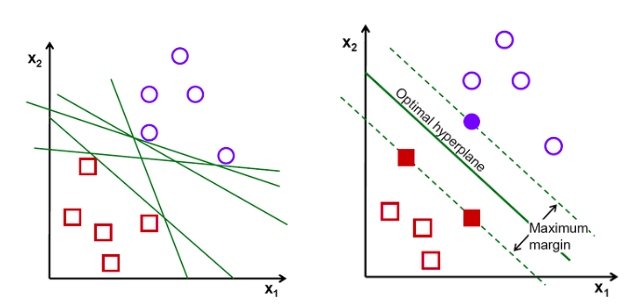

### scikit-learn
* `sklearn.svm.SVC(kernel='poly', degree=3, coef0=1, C=5)`
    * 다항식 커널 트릭 사용
    * degree :  다항식 차수
    * coef0=0 : 다항식 커널의 상수항
    * 차수가 높아 지면 1보다 크고 작은 값의 격차가 커짐
    * 고차항의 영향 조절
* `sklean.svm.SVC(kernel='rbf', gamma=5, C=0.001)`
    * 가우시안 RBF 커널 트릭 사용


#### 랜덤수 분류 예제

/Users/rainer/Dropbox/work/ml_dl/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


result, 0=red, 1=blue: [1]



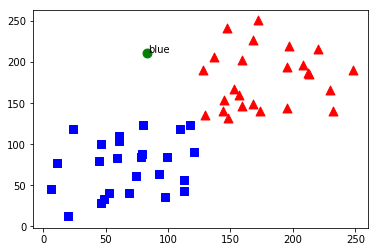

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC

x = np.random.randint(0,125,(25,2))
y = np.random.randint(126, 255,(25,2))
trainData = np.vstack((x,y))
trainData = np.float32(trainData)
responses = np.zeros((50,1), np.int32)
responses[0:25] = 1
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

newcomer = np.random.randint(0,255,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')

svm = SVC()
svm.fit(trainData, responses.ravel())

results = svm.predict(newcomer)
plt.annotate('red' if results[0]==0.0 else 'blue', xy=newcomer[0],
xytext=(newcomer[0]+1))
print("result, 0=red, 1=blue: {}\n".format(results))
plt.show()

### 소프트 마진 분류
* 샘플에 이상치가 있으면 일반화 오류
* C 하이퍼 파라미터
    * 마진오류 : 경계 마진 안에 샘플 위치
    * C 값이 작으면 일반화
    * C 값이 커지면 과대 적합
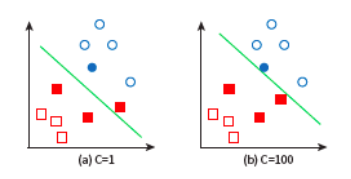    

### 비선형 및 다항식 커널
* 다항식 특성 추가
    * 특성을 2차식으로 추가
    * $x_2 = (x1)^2$
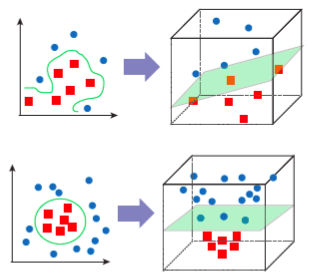

#### 다항식 추가 예제

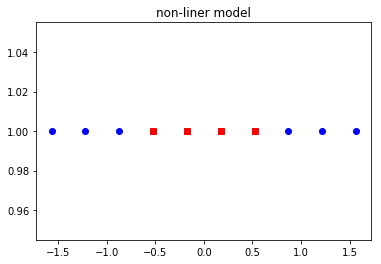

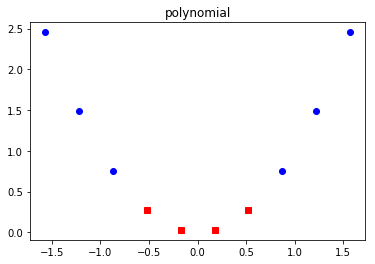

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

x = np.arange(10, dtype=np.float32)
y = np.ones(10)

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
plt.plot(x,y, 'ob')
plt.plot(x[3:7], y[3:7], 'sr')
plt.title('non-liner model')
plt.show()

x2 = (x**2)
plt.plot(x,x2, 'ob')
plt.plot(x[3:7], x2[3:7], 'sr')
plt.title('polynomial')
plt.show()


#### 커널 함수 트릭(kernel trick)
* 다항식 특성을 추가하지 않고 커널 함수로 새로운 거리 값을 계산
    * 실제로 아무 특성도 추가하지 않으면서 다항식 특성을 많이 추가한 효과
* 생성자에 kernel 함수 전달
    * linear
        * $K(x_i, x_j)= x_ix_j$
        * `SVC(kernel='liner')`
    * polynomial
        * $K(x_i, x_j) = (\gamma(x_i, x_j) + r)^d$, $d$ =degree
            * $\gamma$ =coef0 로 전달
        * `SVC(kernel='ploy', degree=3, coef0=1, C=5)`
            * degree : 다항식 차수
            * coef0=0 : 다항식 커널의 상수항 $r$, 차수가 높아지면 1보다 크고 작은 값의 격차가 커짐, 고차항의 영향 조절
    * rbf : (Gausian radial basis function)
        * $K(x_i, x_j) = exp(\gamma||x_i-x_j||^2)$
            * $\gamma$=gamma > 0, 작아 질수록 마진이 커진다.
        * `SCV(kernel='rbf', gamma=5, C=0.001)`
    * sigmoid : $K(x_i, x_j) = (tanh(\gamma(x_i, x_j) + r))$, $r$은 coef0로 전달
        * `SVC(kernel='sigmoid')`

#### SVM 손글씨 인식 예제

In [13]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

print(X_train.shape)
'''
m = np.mean(X_train, axis=0)
X_train -= m
s = np.std(X_train, axis=0)
X_train /= s
print(m.shape, s.shape)

X_test -=m
X_test /= s
'''
#svm = SVC(kernel='rbf',C=1000,  gamma=5)
svm = SVC(kernel='poly', degree=1, coef0=1, C=5, gamma=0.01)

svm.fit(X_train,y_train)

print("Train Accuracy :", svm.score(X_train, y_train))
print("Test Accuracy1 :", svm.score(X_test, y_test))

(1437, 64)
Train Accuracy : 1.0
Test Accuracy1 : 0.9777777777777777


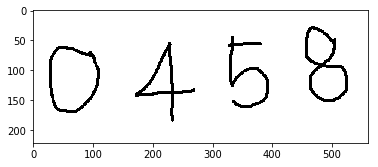

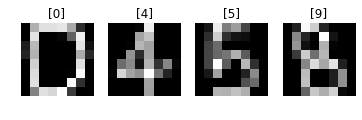

In [15]:
import img2data

image = cv2.imread('./img/0458.png')
plt.imshow(image)
plt.show()
numbers = img2data.img2digits(image, (8,8))
for i, n in enumerate(numbers):
    pred = svm.predict(n)
    #pred = svm.predict(n/255*16)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")

### 최적의 매개변수 찾기
* 하이퍼 파라미터 : 개발자가 지정해야 하는 매개변수
* 그리드 서치
    * `sklearn.model_selection.GridSearvhCV`

In [2]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

parameters = [
    {"C":[1,10,100,1000], "kernel": ["linear"]},
    {"C":[1,10,100,1000], "kernel": ["rbf"], "gamma": [0.001, 0.0001]},
    {"C":[1,10,100,1000], "kernel": ["sigmoid"], "gamma": [0.001, 0.0001]},
]

kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV(SVC(), parameters, cv=kfold_cv)
clf.fit(X_train, y_train)
print("Optimized parameter:", clf.best_estimator_)

print("Accuracy :", clf.score(X_test, y_test))

Optimized parameter: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy : 0.9916666666666667
